In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Load Data

In [ ]:
df = pd.read_csv('/content/tiktok_google_play_reviews.csv')

# Potong dataset menjadi 14.000 baris
df = df.sample(n=14000, random_state=42)

df.head()

<ipython-input-2-ad9684320017>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/tiktok_google_play_reviews.csv')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
170584,263e8a2e-00ef-4d8d-815a-e142e9b1f27a,Nhlanganiso Zwane,https://play-lh.googleusercontent.com/a/ALm5wu...,Beautiful,5,0,NaN,2022-09-18 03:17:00,NaN,NaN
342045,a0162565-6e98-47ce-891c-4fb71f479252,NIZA NACHIONDWA,https://play-lh.googleusercontent.com/a/ALm5wu...,Appreciate your app it brings me to the things...,5,0,25.1.3,2022-07-23 18:01:49,NaN,NaN
321468,1e8790b6-c7fb-4e7d-b42d-99ac5c2631ce,Joshua Okechukwu,https://play-lh.googleusercontent.com/a/ALm5wu...,Love it,5,0,NaN,2022-07-29 19:29:18,NaN,NaN
305346,d78c68f0-ae6e-4535-8492-52b789bce605,NWIZU CHIKODILI,https://play-lh.googleusercontent.com/a/ALm5wu...,My best app ever which I must to visit everyday,5,0,25.3.4,2022-08-03 14:30:43,NaN,NaN
295801,cea25aca-2d26-43df-a375-692d335e955c,alomgir khan,https://play-lh.googleusercontent.com/a-/ACNPE...,Rajon,3,0,25.5.4,2022-08-06 15:28:57,NaN,NaN


## EDA & Preprocessing

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
# pilih kolom yang diperlukan
df = df.loc[:, ['userName', 'content', 'score']]

df.head()

,userName,content,score
170584,Nhlanganiso Zwane,Beautiful,5
342045,NIZA NACHIONDWA,Appreciate your app it brings me to the things...,5
321468,Joshua Okechukwu,Love it,5
305346,NWIZU CHIKODILI,My best app ever which I must to visit everyday,5
295801,alomgir khan,Rajon,3


# Pembersihan Data

In [ ]:
# Menghapus data yang kosong (NaN) pada kolom 'content'
df = df.dropna(subset=['content'])

# Menghapus duplikasi berdasarkan kolom 'content'
df = df.drop_duplicates(subset=['content'])

def clean_text(text):
    text = text.lower()  # Konversi teks ke huruf kecil
    text = re.sub('[^a-zA-Z\s]', '', text)  # Menghapus semua karakter selain huruf dan spasi
    text = re.sub(r'\s+', ' ', text)  # Menghapus spasi berlebih
    text = text.strip()  # Menghapus spasi di awal dan akhir teks
    return text

# Apply cleaning function to 'content' column
df['cleaned_content'] = df['content'].apply(clean_text)

# Menampilkan contoh data sebelum dan sesudah pembersihan teks
print("Sebelum pembersihan:")
print(df['content'].head())

print("\nSesudah pembersihan:")
print(df['cleaned_content'].head())

Sebelum pembersihan:
170584                                            Beautiful
342045    Appreciate your app it brings me to the things...
321468                                              Love it
305346      My best app ever which I must to visit everyday
295801                                                Rajon
Name: content, dtype: object

Sesudah pembersihan:
170584                                            beautiful
342045    appreciate your app it brings me to the things...
321468                                              love it
305346      my best app ever which i must to visit everyday
295801                                                rajon
Name: cleaned_content, dtype: object


# Tokenisasi

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenisasi teks pada kolom 'content'
def tokenize_with_punctuation(text):
    return word_tokenize(text)

df['tokens_before'] = df['cleaned_content'].apply(tokenize_with_punctuation)

# Menampilkan hasil sebelum dan sesudah tokenisasi
print("Sebelum tokenisasi:")
print(df['cleaned_content'].head())
print("\nSetelah tokenisasi:")
print(df['tokens_before'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sebelum tokenisasi:
170584                                            beautiful
342045    appreciate your app it brings me to the things...
321468                                              love it
305346      my best app ever which i must to visit everyday
295801                                                rajon
Name: cleaned_content, dtype: object

Setelah tokenisasi:
170584                                          [beautiful]
342045    [appreciate, your, app, it, brings, me, to, th...
321468                                           [love, it]
305346    [my, best, app, ever, which, i, must, to, visi...
295801                                              [rajon]
Name: tokens_before, dtype: object


# Stop Word Removal

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Mengunduh daftar stopwords dalam bahasa Inggris
stop_words = set(stopwords.words('english'))

# Menghapus stopwords dari tokens
df['tokens_after'] = df['tokens_before'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Display results
print("Sebelum penghapusan stopwords:")
print(df['tokens_before'].head(10))
print("\nSetelah penghapusan stopwords:")
print(df['tokens_after'].head(10))

Sebelum penghapusan stopwords:
170584                                          [beautiful]
342045    [appreciate, your, app, it, brings, me, to, th...
321468                                           [love, it]
305346    [my, best, app, ever, which, i, must, to, visi...
295801                                              [rajon]
182523                                       [it, is, slow]
52416                                     [i, love, tiktok]
372940    [i, updated, the, app, and, then, it, got, rid...
421163                                               [best]
28977                                                [nice]
Name: tokens_before, dtype: object

Setelah penghapusan stopwords:
170584                                          [beautiful]
342045              [appreciate, app, brings, things, love]
321468                                               [love]
305346             [best, app, ever, must, visit, everyday]
295801                                              [rajon]
18

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Inisialisasi stemmer Porter
stemmer = PorterStemmer()

# Stemming
df['tokens_after_stemming'] = df['tokens_after'].apply(lambda x: [stemmer.stem(word) for word in x])

# Menampilkan hasil sebelum dan setelah stemming
print("Sebelum stemming:")
print(df['tokens_after'].head(10))
print("\nSetelah stemming:")
print(df['tokens_after_stemming'].head(10))

Sebelum stemming:
170584                                          [beautiful]
342045              [appreciate, app, brings, things, love]
321468                                               [love]
305346             [best, app, ever, must, visit, everyday]
295801                                              [rajon]
182523                                               [slow]
52416                                        [love, tiktok]
372940    [updated, app, got, rid, search, unstalled, ti...
421163                                               [best]
28977                                                [nice]
Name: tokens_after, dtype: object

Setelah stemming:
170584                                             [beauti]
342045                   [appreci, app, bring, thing, love]
321468                                               [love]
305346             [best, app, ever, must, visit, everyday]
295801                                              [rajon]
182523                       

#LABELLING

In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 899.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=6b234f350dd4afafde358889589d7251d0fadc62c08e7c36772d8fec3fa5351c
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from afinn import Afinn
afinn = Afinn()

# Menambahkan kolom 'sentiment_score' berdasarkan isi 'content'
df['sentiment_score'] = df['cleaned_content'].apply(afinn.score)

# Menambahkan kolom 'sentiment' berdasarkan 'sentiment_score'
df['sentiment'] = df['sentiment_score'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

# Menampilkan DataFrame dengan kolom 'sentiment_score' dan 'sentiment' baru
print(df[['cleaned_content', 'sentiment_score', 'sentiment']])

                                          cleaned_content  sentiment_score  \
170584                                          beautiful              3.0   
342045  appreciate your app it brings me to the things...              5.0   
321468                                            love it              3.0   
305346    my best app ever which i must to visit everyday              3.0   
295801                                              rajon              0.0   
...                                                   ...              ...   
170549                                    this app so fun              4.0   
22032   amazing entertaining and it is a great company...              9.0   
71876                              awesome fun every time              8.0   
24519                i want be viral on tik tok thats all              1.0   
208257                                                sei              0.0   

       sentiment  
170584  Positive  
342045  Positive  
321468

# TF-IDF

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Terapkan TF-IDF pada kolom 'content'
X = vectorizer.fit_transform(df['cleaned_content'])

# Untuk melihat hasil TF-IDF dalam bentuk DataFrame
# Ambil fitur-fitur (kata-kata) dari vektorizer
features = vectorizer.get_feature_names_out()

# Ubah hasil TF-IDF menjadi DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=features)

print(tfidf_df.head())

    aa  aaa  aad  aadikashmiriviral  aae  aafreen  aaimai  aais  aajizbhai  \
0  0.0  0.0  0.0                0.0  0.0      0.0     0.0   0.0        0.0   
1  0.0  0.0  0.0                0.0  0.0      0.0     0.0   0.0        0.0   
2  0.0  0.0  0.0                0.0  0.0      0.0     0.0   0.0        0.0   
3  0.0  0.0  0.0                0.0  0.0      0.0     0.0   0.0        0.0   
4  0.0  0.0  0.0                0.0  0.0      0.0     0.0   0.0        0.0   

   aalada  ...  zubair  zubairch  zuckerberg  zuiu  zuldaan  zulkifal  zyad  \
0     0.0  ...     0.0       0.0         0.0   0.0      0.0       0.0   0.0   
1     0.0  ...     0.0       0.0         0.0   0.0      0.0       0.0   0.0   
2     0.0  ...     0.0       0.0         0.0   0.0      0.0       0.0   0.0   
3     0.0  ...     0.0       0.0         0.0   0.0      0.0       0.0   0.0   
4     0.0  ...     0.0       0.0         0.0   0.0      0.0       0.0   0.0   

    zz  zzoe  zzz  
0  0.0   0.0  0.0  
1  0.0   0.0  0.

#### WordCloud

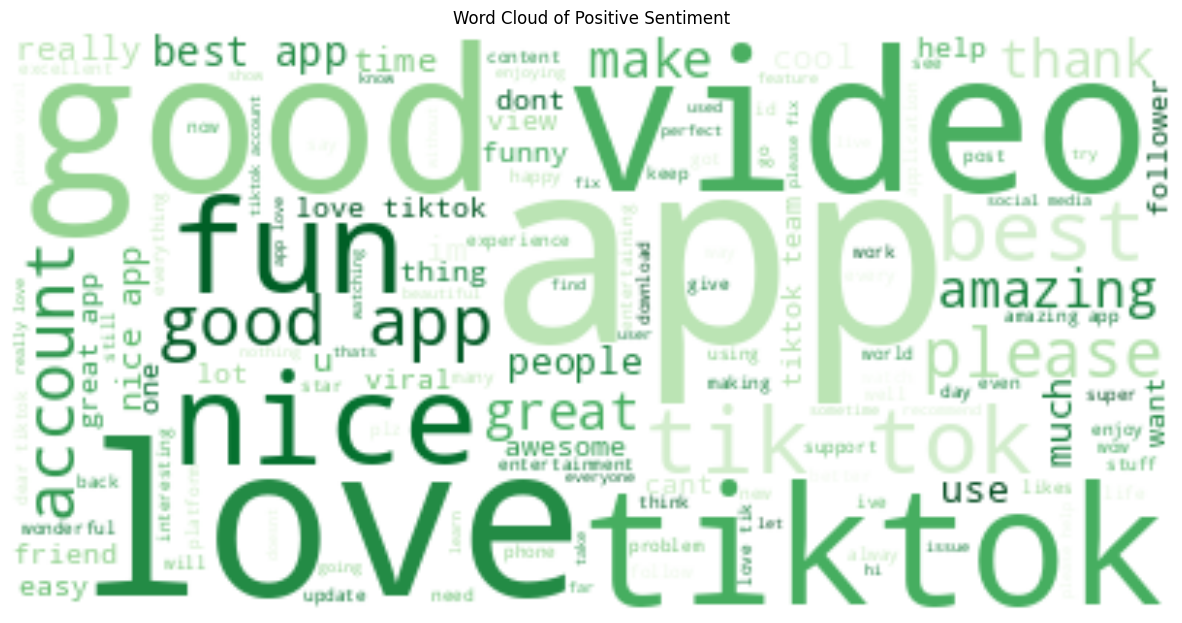

In [ ]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

df_positif = df[df['sentiment'] == 'Positive']
all_words_positif = ' '.join([twts for twts in df_positif['cleaned_content']])
wordcloud_positif = WordCloud(background_color="white", colormap="Greens").generate(all_words_positif)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment')
plt.show()

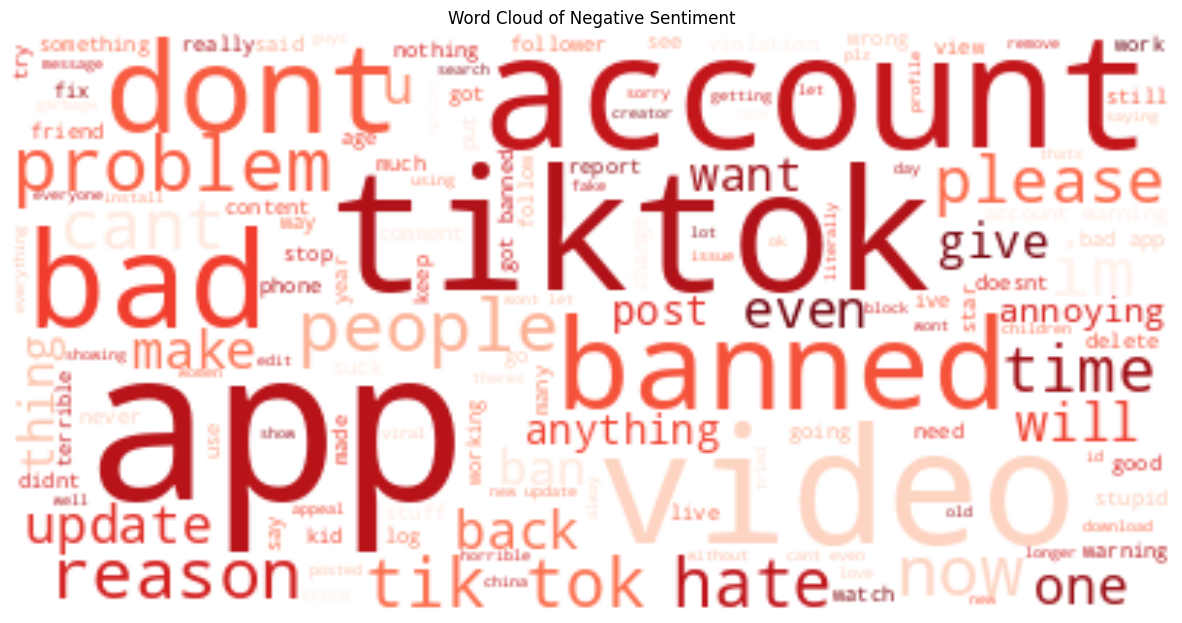

In [ ]:
df_negatif = df[df['sentiment'] == 'Negative']
all_words_negatif = ' '.join([twts for twts in df_negatif['cleaned_content']])
wordcloud_negatif = WordCloud(background_color="white", colormap="Reds").generate(all_words_negatif)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment')
plt.show()

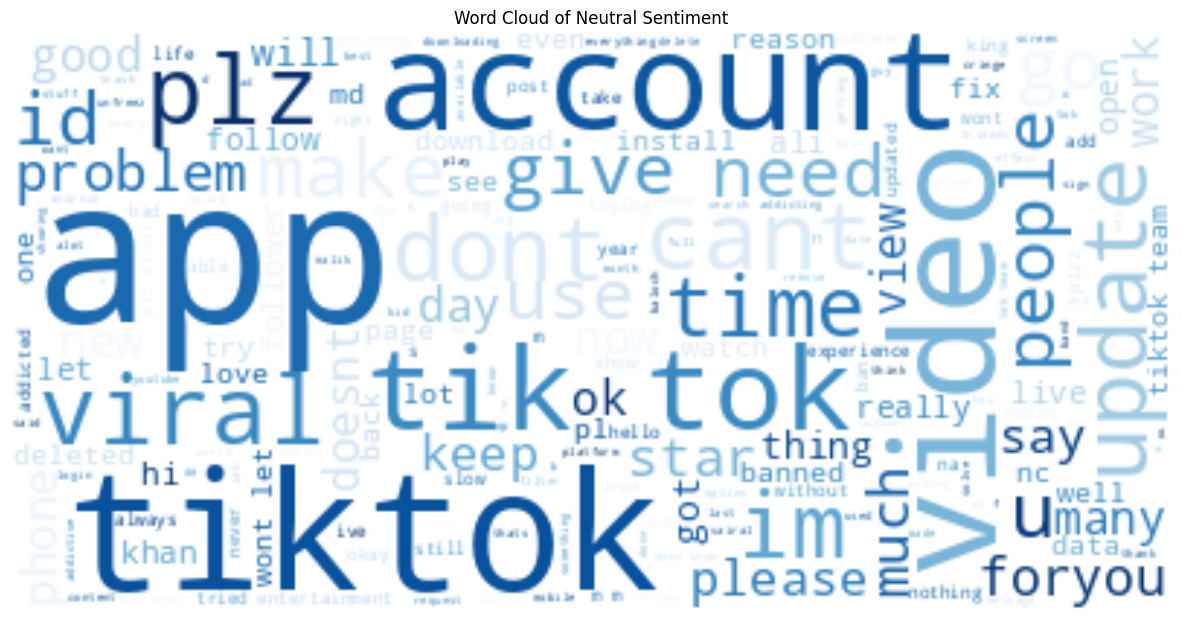

In [ ]:
df_netral = df[df['sentiment'] == 'Neutral']
all_words_netral = ' '.join([twts for twts in df_netral['cleaned_content']])
wordcloud_netral = WordCloud(background_color="white", colormap="Blues").generate(all_words_netral)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud_netral, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Neutral Sentiment')
plt.show()

#### Target Distribution

In [ ]:
temp = df.groupby('sentiment').count()['cleaned_content'].reset_index().sort_values(by='cleaned_content',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentiment,cleaned_content
2,Positive,5400
1,Neutral,3648
0,Negative,1018


<Axes: xlabel='sentiment', ylabel='count'>

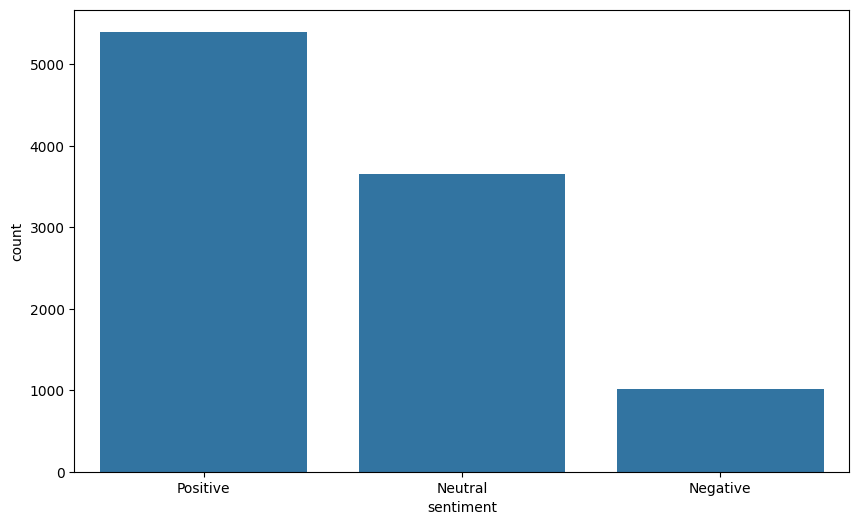

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment',data=df)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.cleaned_content,
    title = {"position": "top center", "text": "Funnel-Chart of Target Distribution"}
    ))
fig.show()

#### SPLIT

In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8052, 8774), (2014, 8774))

# Resampling target

target pengambilan sampel ulang hanya digunakan untuk pemodelan

Untuk menangani ketidakseimbangan kelas dalam dataset menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique)

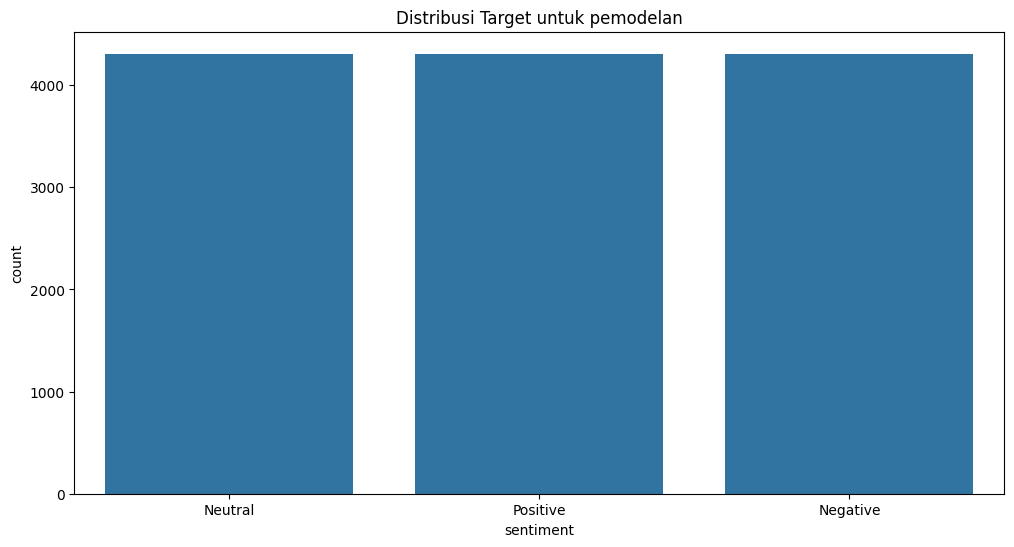

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi Target untuk pemodelan')
plt.show()

## Klasifikasi Model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# init parameters
svm_param_grid = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto']}

### Support Vector Machine

In [ ]:
svm_model = RandomizedSearchCV(SVC(random_state=42), svm_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
svm_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy')

In [ ]:
# print best param
print("\nBest Parameters for Support Vector Machine:", svm_model.best_params_)


Best Parameters for Support Vector Machine: {'kernel': 'linear', 'gamma': 'auto', 'C': 10}


### Model Evaluasi


In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_svm = svm_model.best_estimator_.predict(X_test)

# Evaluasi performa menggunakan validasi silang
from sklearn.model_selection import cross_val_score

# Akurasi
accuracy = cross_val_score(svm_model.best_estimator_, X, df['sentiment'], cv=5, scoring='accuracy').mean()

# Presisi
precision = cross_val_score(svm_model.best_estimator_, X, df['sentiment'], cv=5, scoring='precision_weighted').mean()

# Recall
recall = cross_val_score(svm_model.best_estimator_, X, df['sentiment'], cv=5, scoring='recall_weighted').mean()

# F1 Score
f1 = cross_val_score(svm_model.best_estimator_, X, df['sentiment'], cv=5, scoring='f1_weighted').mean()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9103902587501006
Precision: 0.9104564827568019
Recall: 0.9103902587501006
F1 Score: 0.9100623939568045


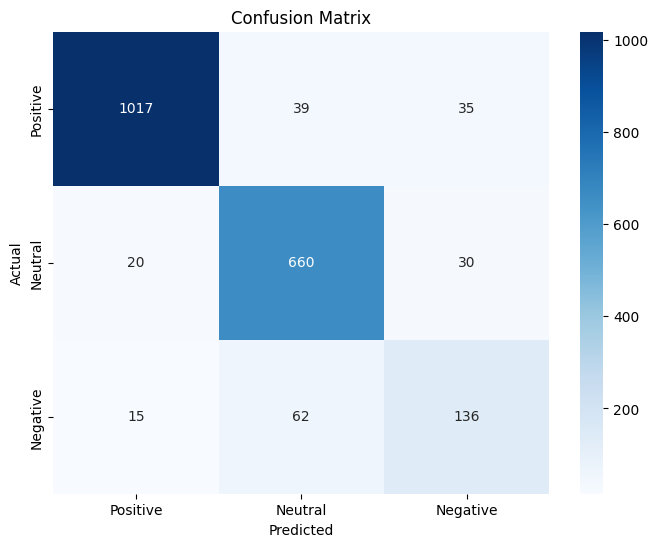

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm, labels=['Positive', 'Neutral', 'Negative'])

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\n\nClassification Report:")
print(classification_report(y_test, y_pred_svm))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.68      0.64      0.66       213
     Neutral       0.87      0.93      0.90       710
    Positive       0.97      0.93      0.95      1091

    accuracy                           0.90      2014
   macro avg       0.84      0.83      0.83      2014
weighted avg       0.90      0.90      0.90      2014

